In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
import xgboost as xgb

from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import RobustScaler

In [108]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_excel('/content/test_cursanti.xlsx')

df_test_with_predict = df_test.copy()   # am creat o copye  pn a adauga coloana cu predictii la final

In [109]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [110]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [111]:
df_train.head()

state  account_length      area_code international_plan voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  total_night_charge  total_intl_minutes  total_intl_calls  total_intl_charge  number_customer_service_calls payment_delay
0    HI              33  area_code_415                 no              no                      0              200.5              117             34.09              159.9              111             13.59                196.2                 84                8.83                16.3                 6               4.40                              3            no
1    TN              80  area_code_415                yes              no                      0              276.5              122             47.01              195.6               79             16.63                210.3                 78                9.46                 7.2                 3               1.94                              1           yes
2    CT              37  area_code_408                 no              no                      0              134.9               98             22.93              248.4              130             21.11                236.2                113               10.63                14.7                 2               3.97                              3            no
3    TN             106  area_code_415                 no              no                      0              119.2              142             20.26              228.4              139             19.41                197.9                 61                8.91                 8.4                 9               2.27                              2            no
4    TX             123  area_code_408                 no              no                      0              260.9               85             44.35              168.5              103             14.32                178.3                 91                8.02                13.3                 5               3.59                              3            no

In [112]:
df_test.head()

state  account_length      area_code international_plan voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  total_night_charge  total_intl_minutes  total_intl_calls  total_intl_charge  number_customer_service_calls
0    MI             102  area_code_510                 no              no                      0              242.2               88             41.17              233.2               89             19.82                188.5                121                8.48                 6.2                 6               1.67                              3
1    VA             139  area_code_510                 no             yes                     23              157.6              129             26.79              247.0               96             21.00                259.2                112               11.66                13.7                 2               3.70                              0
2    TX             128  area_code_415                 no             yes                     40              171.2               88             29.10              145.7              109             12.38                196.8                 93                8.86                14.0                 6               3.78                              1
3    FL              79  area_code_510                 no              no                      0              130.2              119             22.13              290.9              121             24.73                194.8                140                8.77                14.0                 6               3.78                              3
4    DE             127  area_code_510                 no              no                      0              241.7              115             41.09              141.5               96             12.03                170.7                 94                7.68                 4.5                 5               1.22                              2

In [113]:
df_train.describe().T

count        mean        std   min       25%     50%       75%     max
account_length                 3000.0  100.510000  39.485782   1.0   73.0000  100.00  127.0000  233.00
number_vmail_messages          3000.0    7.977333  13.730125   0.0    0.0000    0.00   18.0000   52.00
total_day_minutes              3000.0  180.456533  54.098371   0.0  143.7000  179.40  216.8000  346.80
total_day_calls                3000.0  100.228667  19.763769   0.0   87.0000  101.00  113.0000  165.00
total_day_charge               3000.0   30.678167   9.196706   0.0   24.4300   30.50   36.8600   58.96
total_eve_minutes              3000.0  200.034000  50.127406  22.3  165.8000  199.90  233.7000  363.70
total_eve_calls                3000.0  100.247333  19.761638  12.0   87.0000  101.00  113.0000  169.00
total_eve_charge               3000.0   17.003100   4.260769   1.9   14.0900   16.99   19.8600   30.91
total_night_minutes            3000.0  201.099633  50.863770   0.0  166.9750  201.60  235.2250  395.00
total_night_calls              3000.0   99.939667  19.669680   0.0   87.0000  100.00  113.0000  175.00
total_night_charge             3000.0    9.049577   2.288908   0.0    7.5175    9.07   10.5825   17.77
total_intl_minutes             3000.0   10.206500   2.749696   0.0    8.5000   10.30   12.0000   20.00
total_intl_calls               3000.0    4.495333   2.489051   0.0    3.0000    4.00    6.0000   20.00
total_intl_charge              3000.0    2.756263   0.742311   0.0    2.3000    2.78    3.2400    5.40
number_customer_service_calls  3000.0    1.591667   1.314346   0.0    1.0000    1.00    2.0000    9.00

In [114]:
df_test.describe().T

count        mean        std    min       25%     50%       75%     max
account_length                 202.0  102.188119  39.497267  10.00   75.2500  103.00  128.0000  205.00
number_vmail_messages          202.0    9.485149  14.106287   0.00    0.0000    0.00   23.7500   45.00
total_day_minutes              202.0  183.613861  56.429346  47.80  142.3500  187.25  223.9750  326.10
total_day_calls                202.0  100.594059  18.886505  53.00   88.0000  101.00  113.7500  141.00
total_day_charge               202.0   31.215248   9.593345   8.13   24.2000   31.83   38.0800   55.44
total_eve_minutes              202.0  203.918317  53.622597  65.20  166.2250  206.00  239.0750  354.20
total_eve_calls                202.0  100.376238  18.766357  44.00   88.0000  102.00  112.7500  155.00
total_eve_charge               202.0   17.333267   4.557968   5.54   14.1275   17.51   20.3200   30.11
total_night_minutes            202.0  193.955446  51.993733  54.50  159.1500  195.55  230.7500  323.00
total_night_calls              202.0  100.801980  20.185222  48.00   86.2500  100.50  115.0000  151.00
total_night_charge             202.0    8.728267   2.339806   2.45    7.1575    8.80   10.3875   14.54
total_intl_minutes             202.0   10.120792   2.943424   0.00    8.2000   10.20   12.2750   17.20
total_intl_calls               202.0    4.277228   2.056993   0.00    3.0000    4.00    5.0000   12.00
total_intl_charge              202.0    2.733069   0.794408   0.00    2.2100    2.75    3.3125    4.64
number_customer_service_calls  202.0    1.425743   1.212263   0.00    1.0000    1.00    2.0000    5.00

# EDA

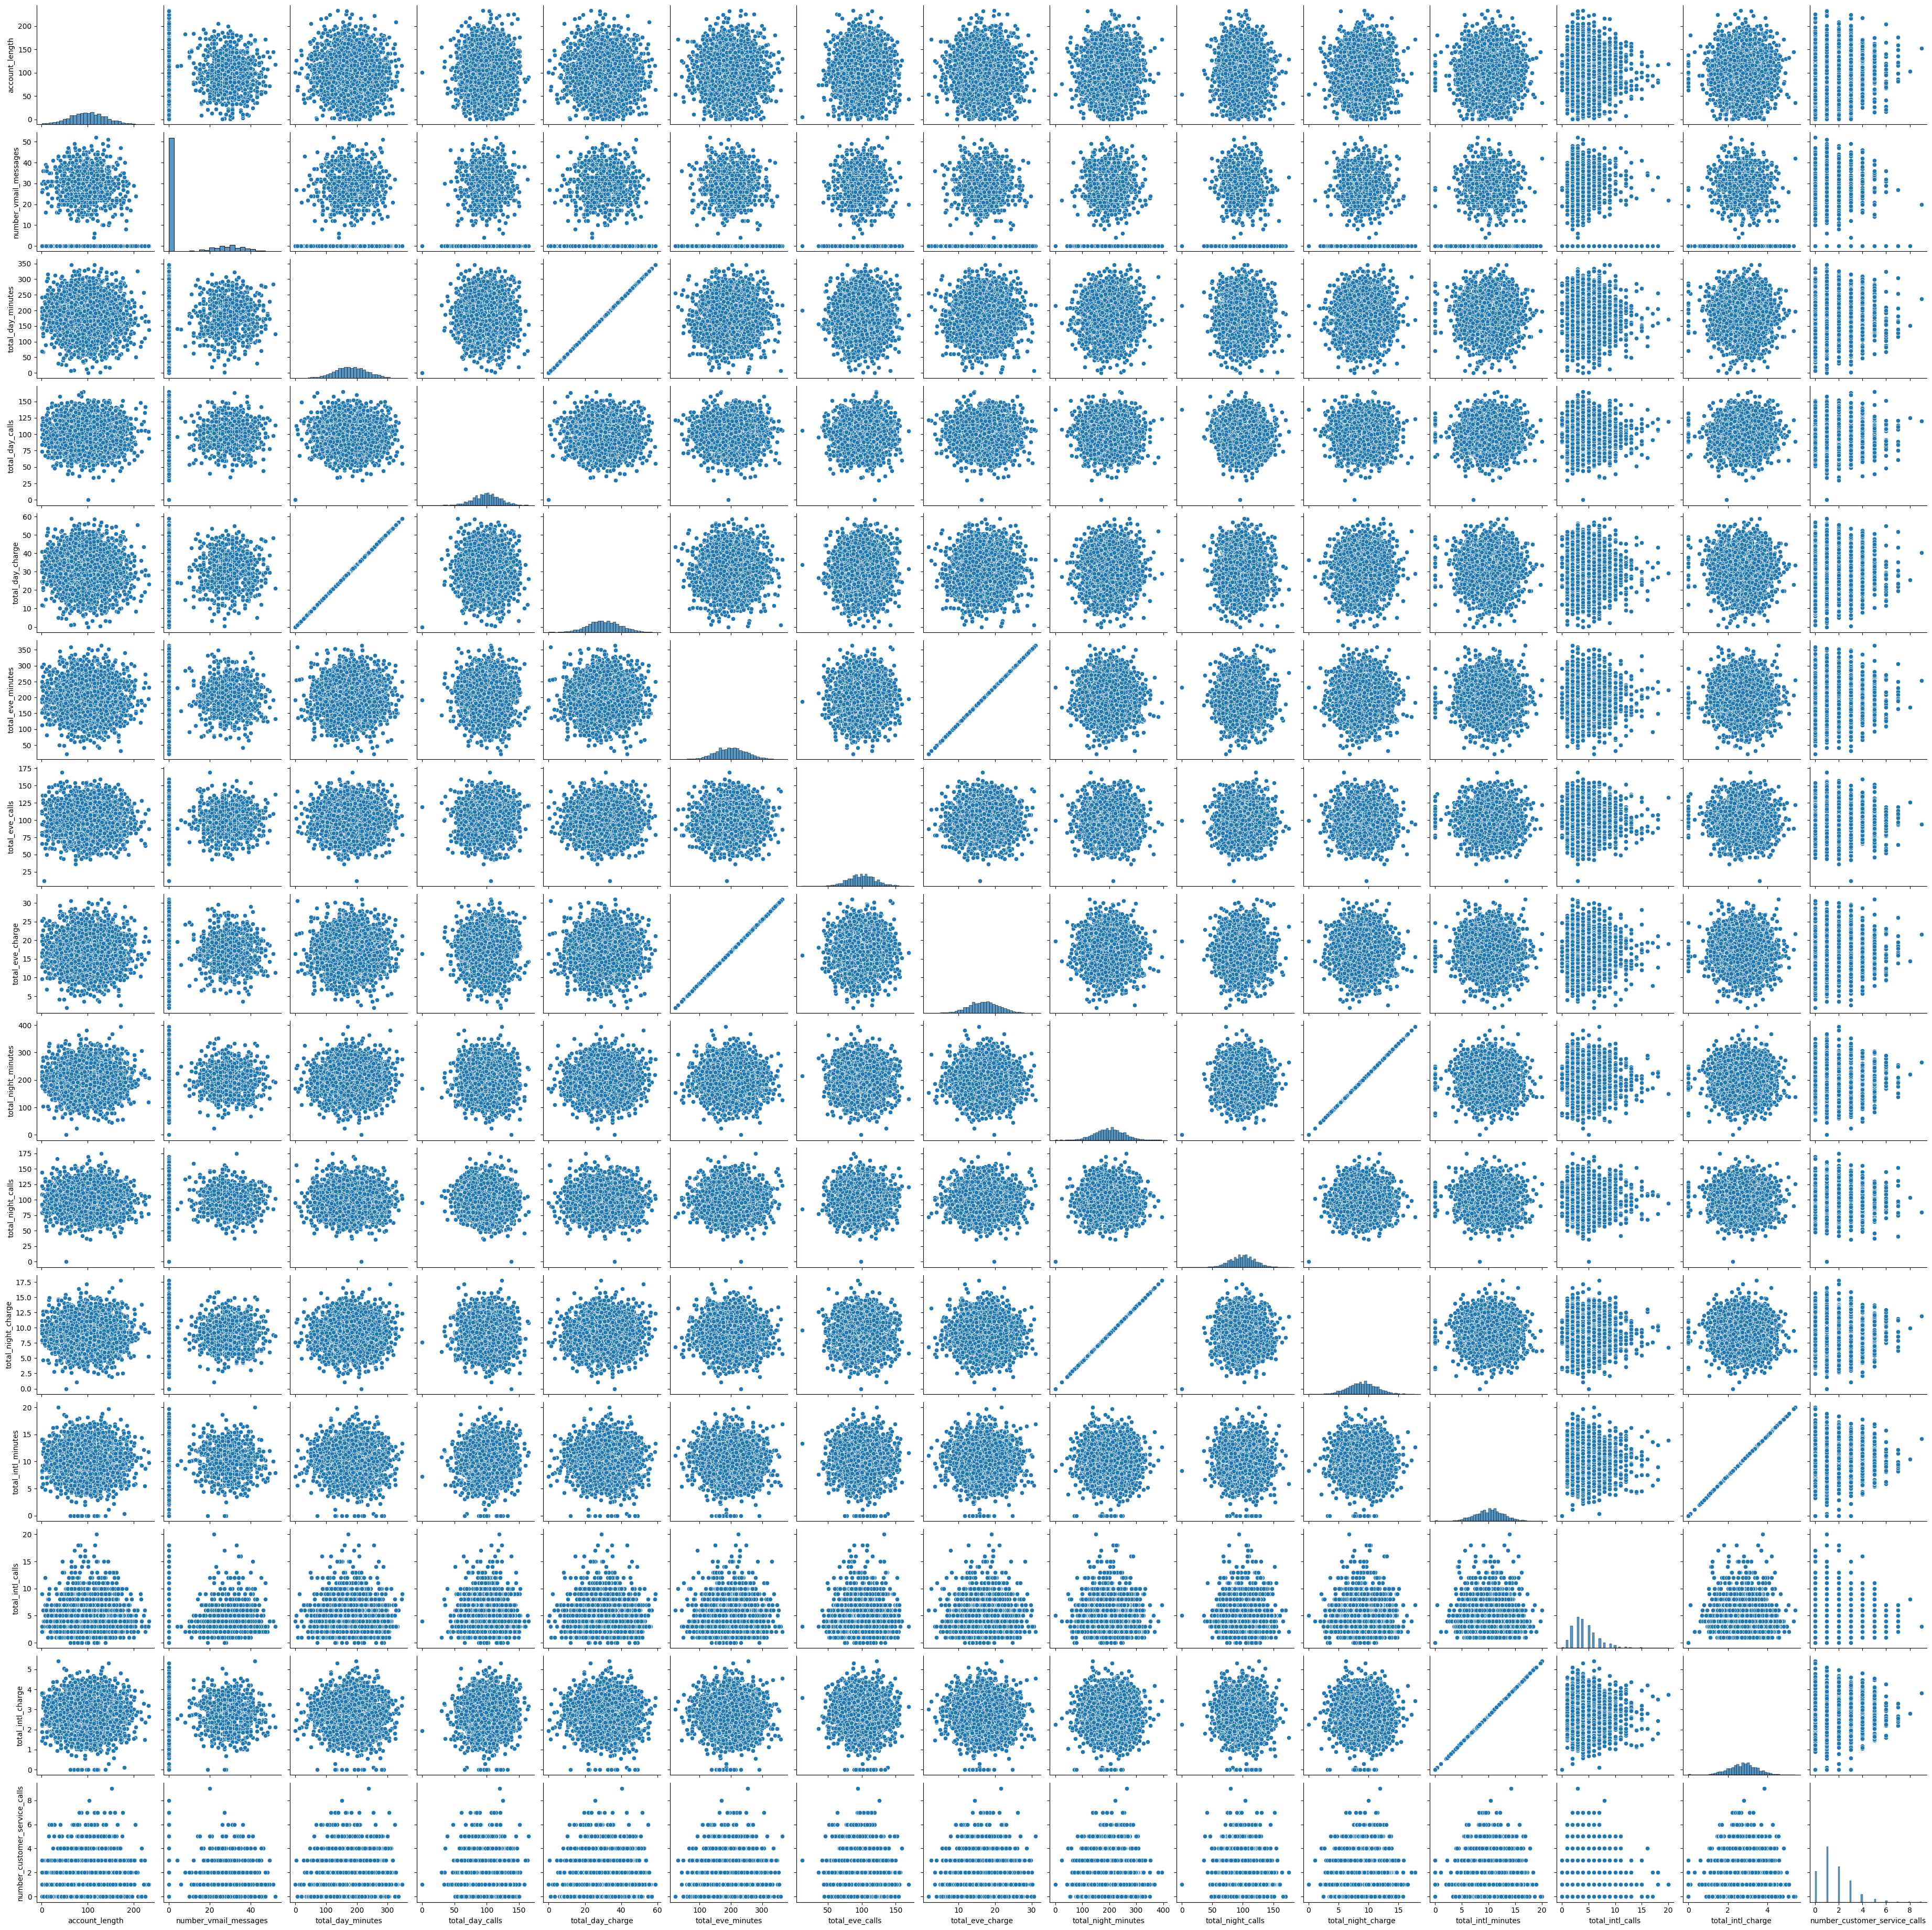

In [115]:
sns.pairplot(df_train)
plt.show()

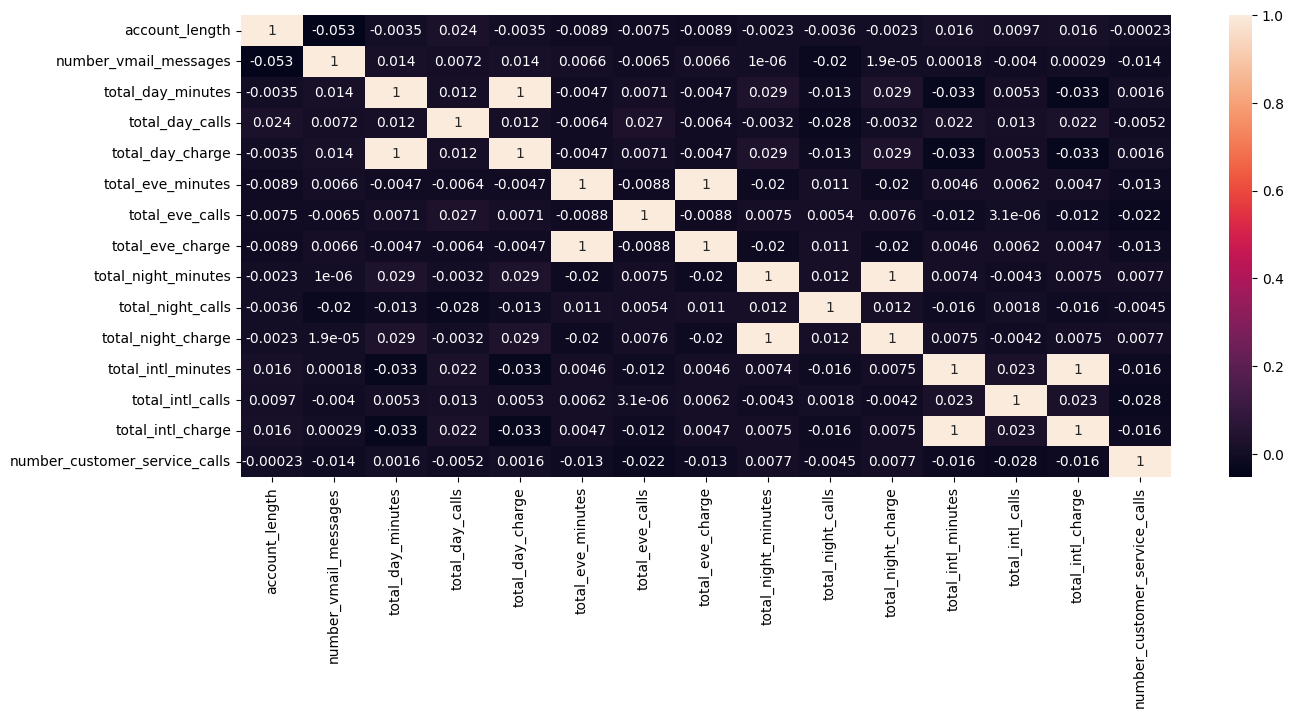

In [116]:
def corelation_df_train():

    plt.figure(figsize=(15,6))
    corr = df_train.corr()
    sns.heatmap(corr, annot=True)
    plt.show()

corelation_df_train()

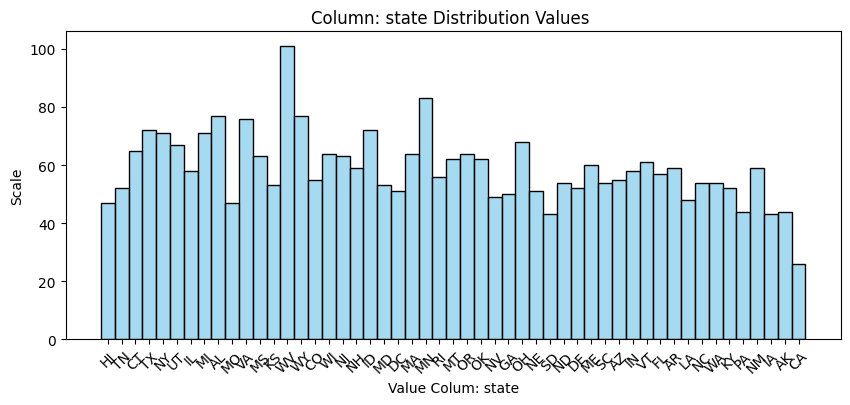

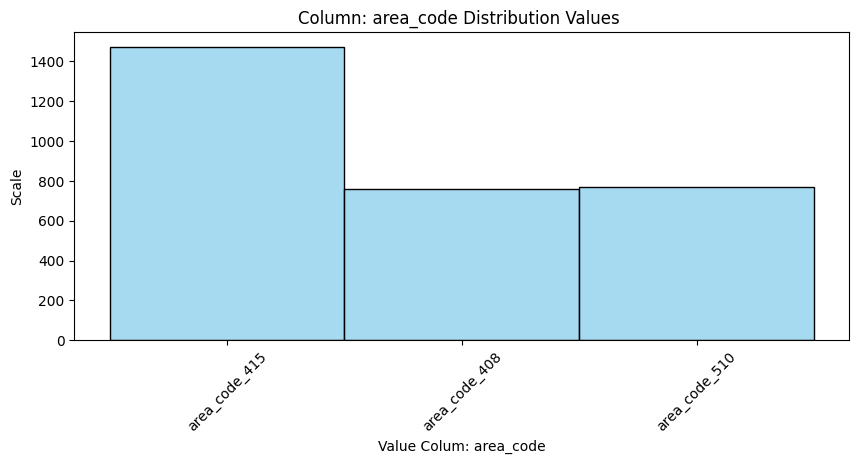

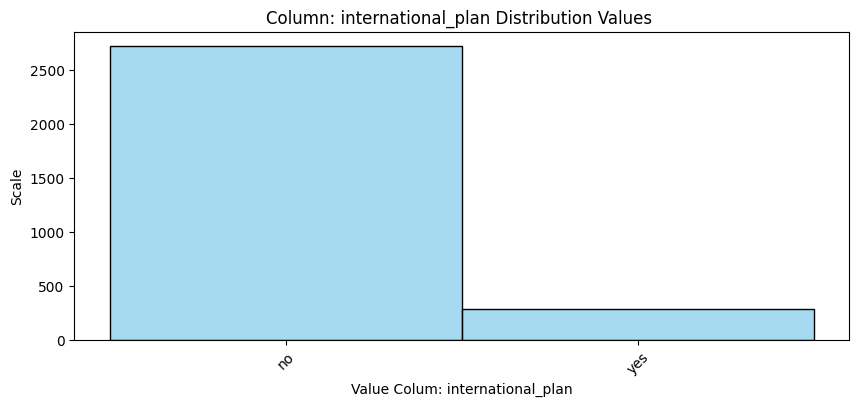

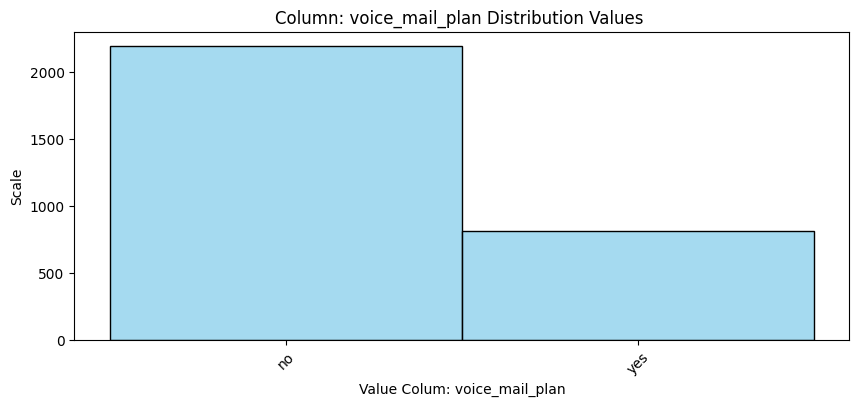

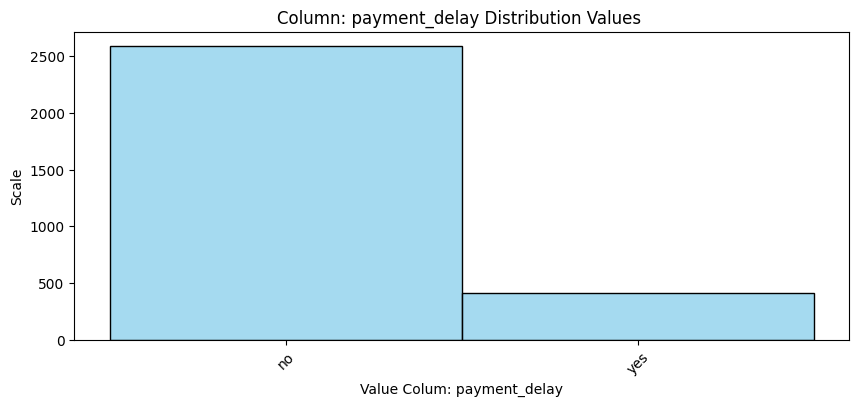

In [117]:
def graf_object_value(x):

  for col in col_obj:
    plt.figure(figsize=(10,4))
    sns.histplot(df_train[col], bins=30, color='skyblue')
    plt.xticks(rotation=45)
    plt.xlabel(f'Value Colum: {col}')
    plt.ylabel(f'Scale')
    plt.title(f'Column: {col} Distribution Values ')
    plt.show()

col_obj = [x for x in df_train.columns if df_train[x].dtype == 'object']
graf_object_value(col_obj)

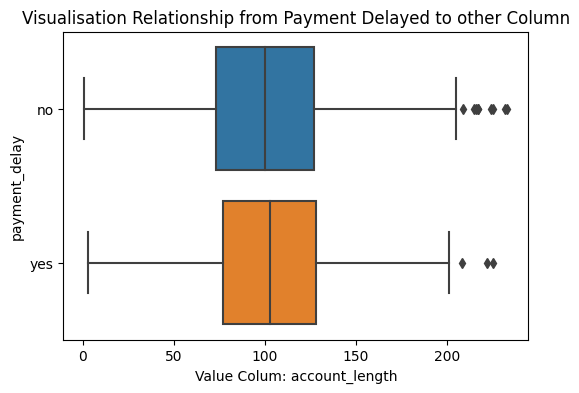

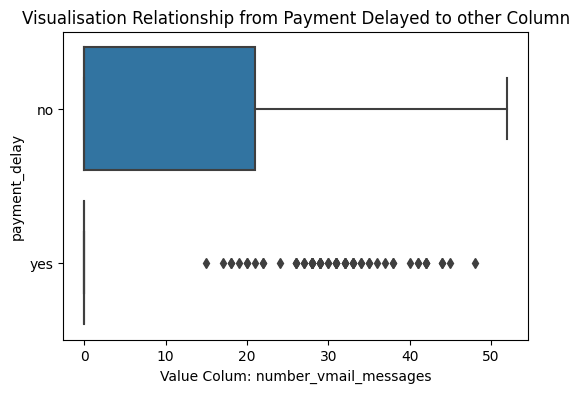

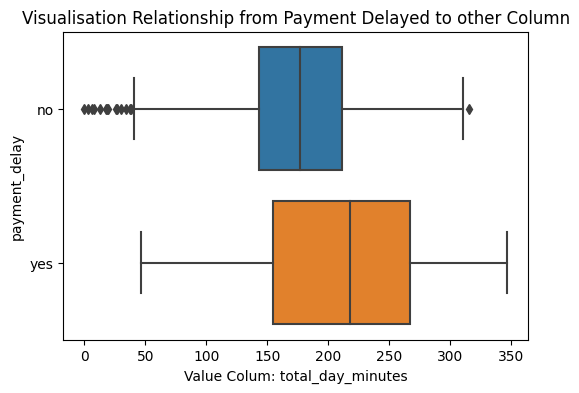

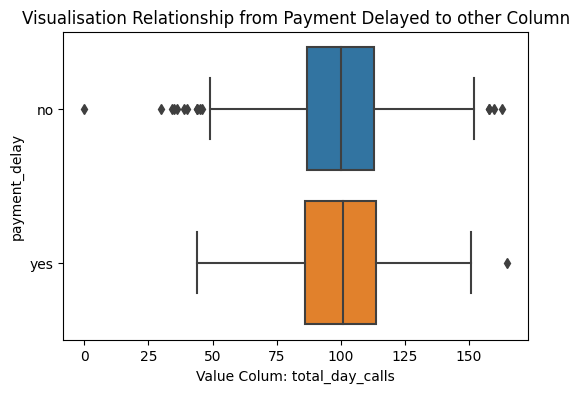

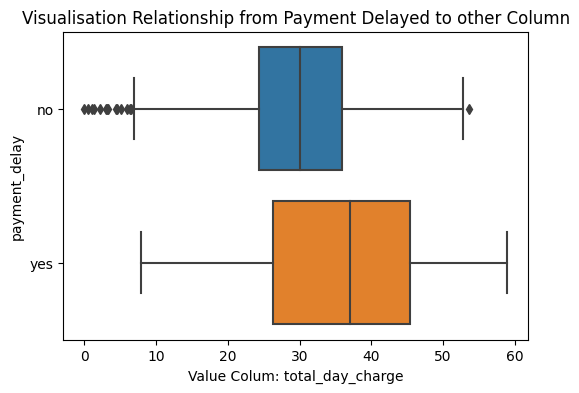

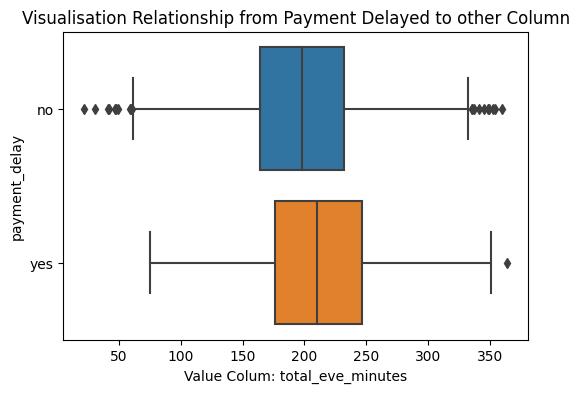

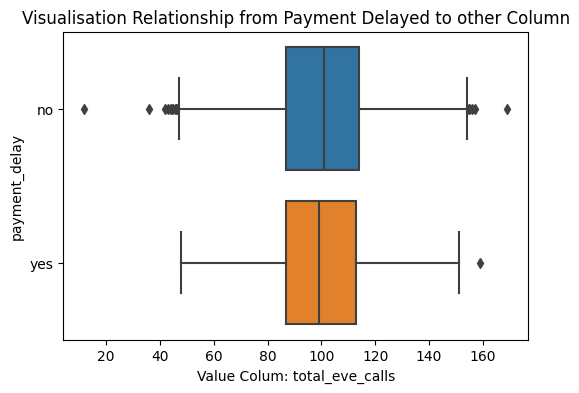

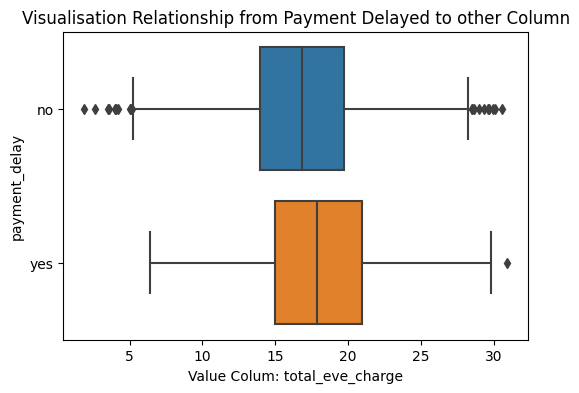

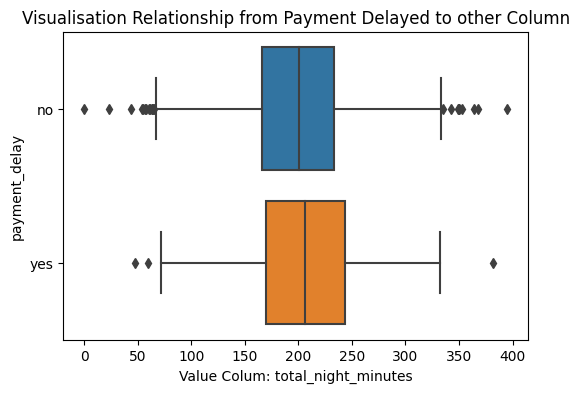

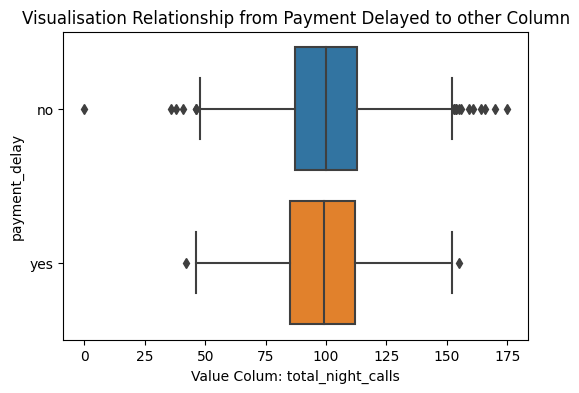

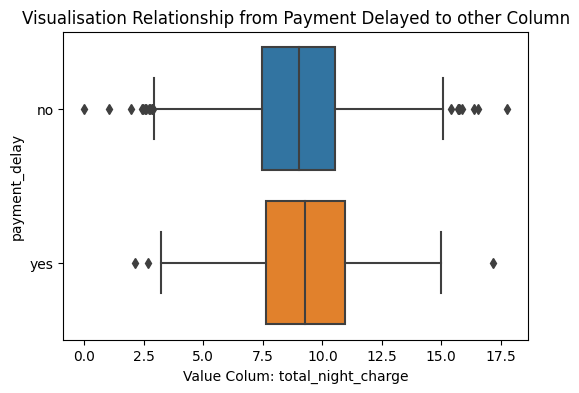

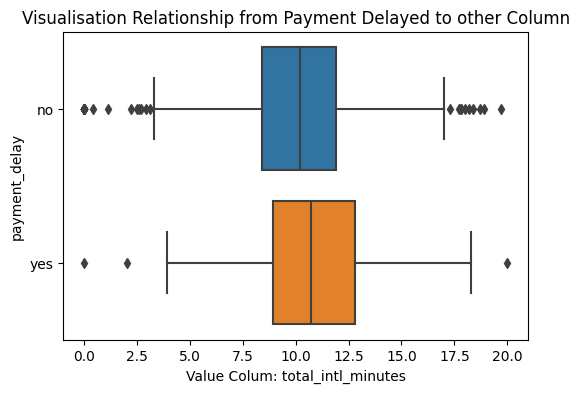

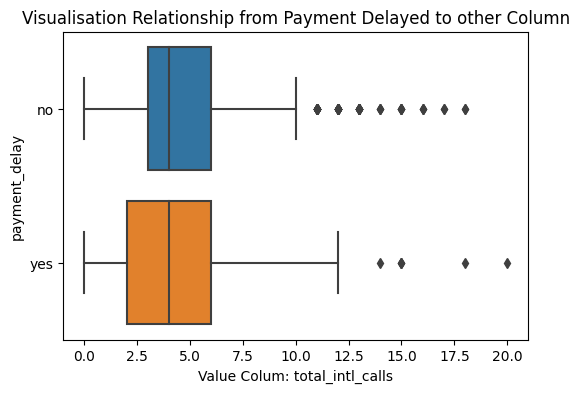

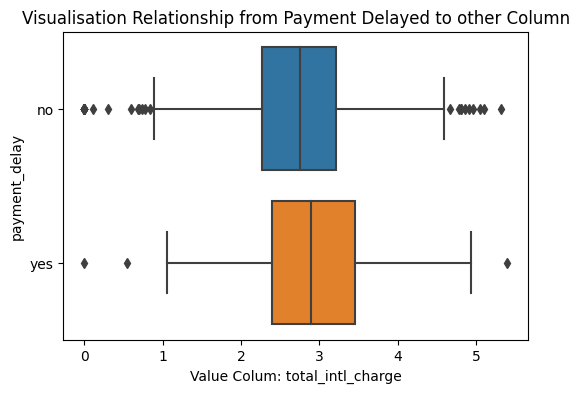

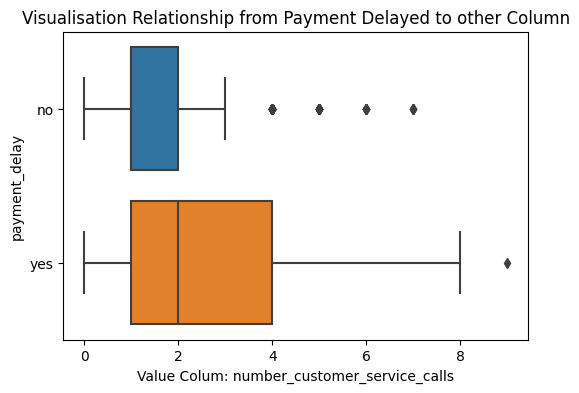

In [118]:
def graf_object_value(colum):

  for col in col_obj:
    plt.figure(figsize = (6, 4))
    ax = sns.boxplot(x=df_train[col], y='payment_delay', data=df_train)
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    plt.xlabel(f'Value Colum: {col}')
    plt.ylabel(f'payment_delay')
    plt.title(f'Visualisation Relationship from Payment Delayed to other Column')
    plt.show()

col_obj = [x for x in df_train.columns if df_train[x].dtype == 'int64' or df_train[x].dtype == 'float64']
graf_object_value(col_obj)


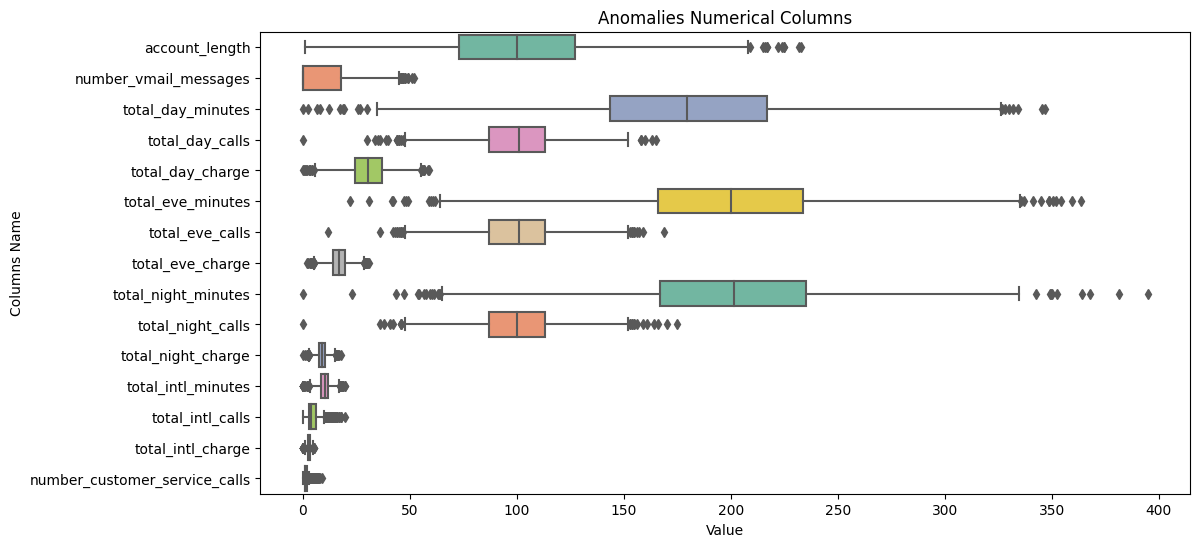

In [119]:
# Visualizam anomalii  in functie de perioada zilei

def outliers_func_visualisation(col):

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_train[col_int], orient='h', palette='Set2')
    plt.xlabel('Value')
    plt.ylabel('Columns Name')
    plt.title('Anomalies Numerical Columns')
    plt.show()

col_int = [x for x in df_train.columns if df_train[x].dtype == 'int64' or df_train[x].dtype == 'float64']
outliers_func_visualisation(col_int)

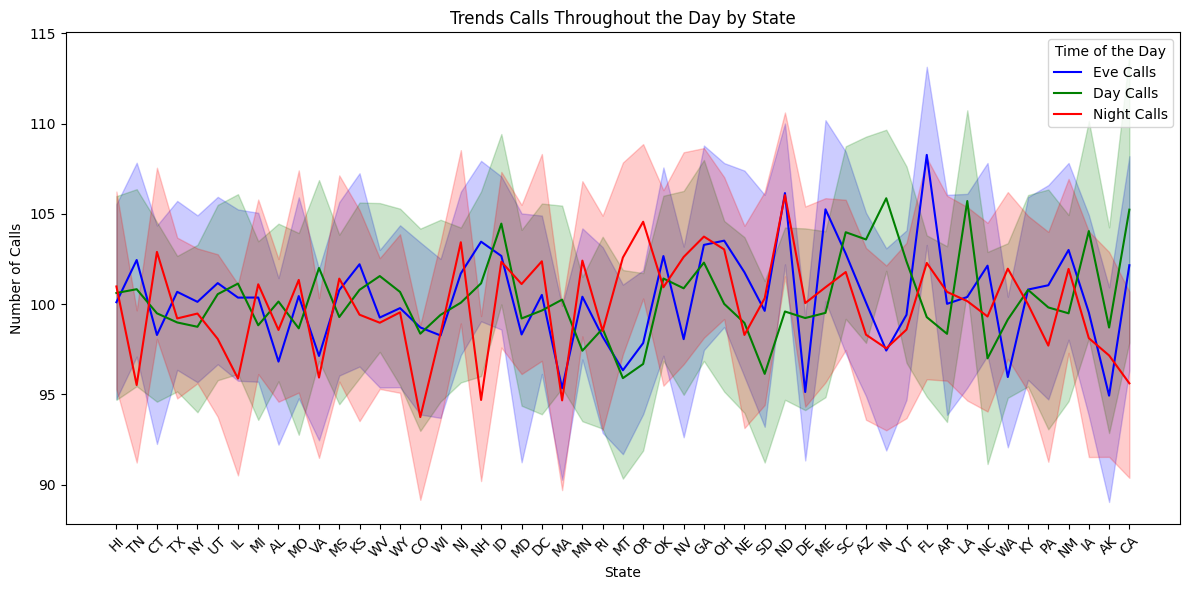

In [120]:
# Vizualizam care state sunt mai active sa apeleze serviciul clienti

def trends_call_by_state():

  plt.figure(figsize=(12, 6))
  sns.lineplot(x='state', y='total_eve_calls', data=df_train, color='b', label='Eve Calls')
  sns.lineplot(x='state', y='total_day_calls', data=df_train, color='g', label='Day Calls')
  sns.lineplot(x='state', y='total_night_calls', data=df_train, color='r', label='Night Calls')

  plt.xlabel('State')
  plt.ylabel('Number of Calls')
  plt.title('Trends Calls Throughout the Day by State')
  plt.legend(title='Time of the Day')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

trends_call_by_state()

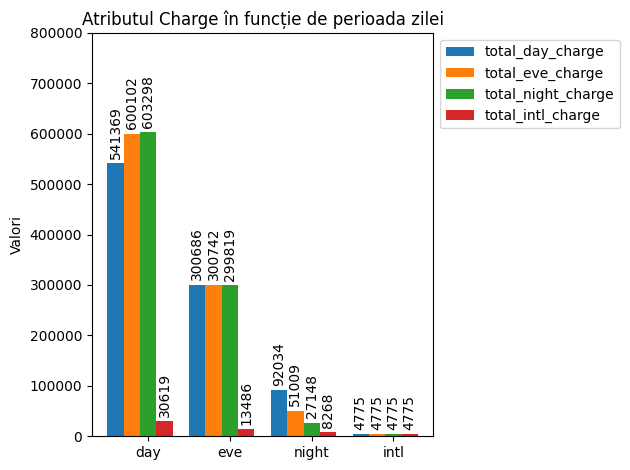

In [121]:
# Vizualizarea activitatii clientilor in functie de perioada zilei


species = ("day", "eve", "night", "intl")
col = {
    'total_day_charge': (541369, 300686, 92034, 4775),
    'total_eve_charge': (600102, 300742, 51009, 4775),
    'total_night_charge': (603298, 299819, 27148, 4775),
    'total_intl_charge': (30619, 13486, 8268, 4775)
}
x = np.arange(len(species))
width = 0.2
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in col.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, rotation=90)
    multiplier += 1

ax.set_ylabel('Valori')
ax.set_title('Atributul Charge în funcție de perioada zilei')
ax.set_xticks(x + width * (len(col) / 2))
ax.set_xticklabels(species)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylim(0, 800000, 5000)
plt.tight_layout()

plt.show()


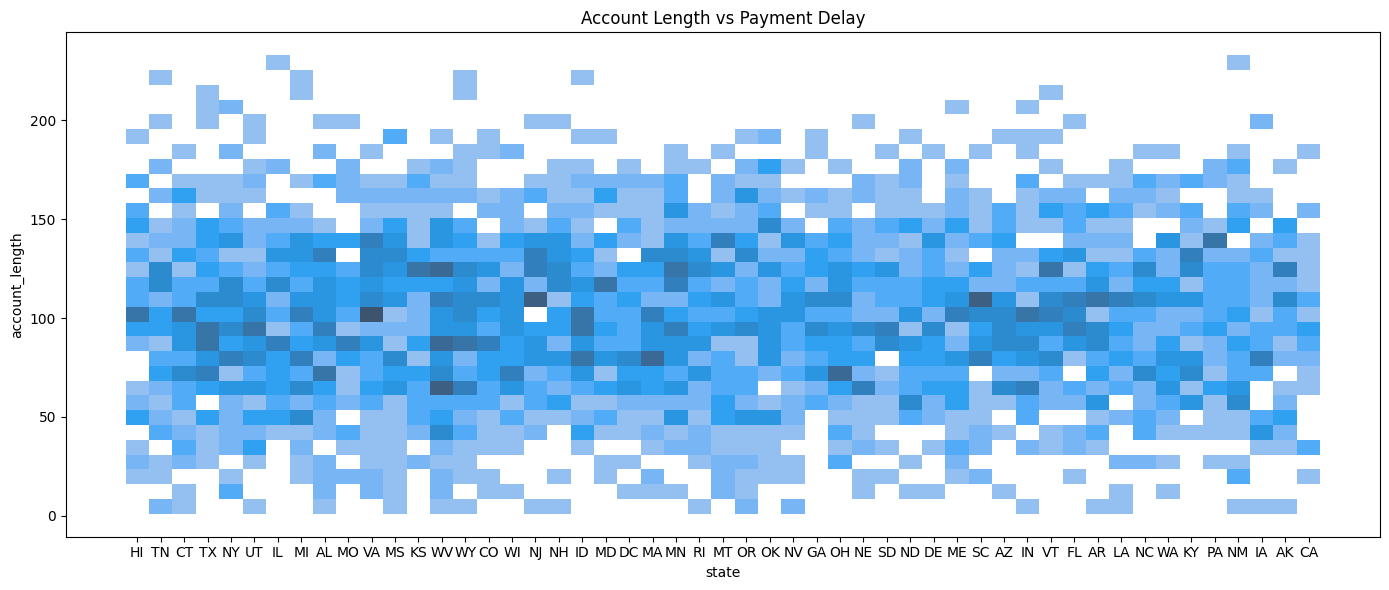

In [122]:
# Vizualizarea vechimii contului pentru fiecare stat

def account_length(x, y, data=df_train):
    plt.figure(figsize=(14, 6))
    sns.histplot(x=x, y=y, data=data, palette='deep', kde=True)
    plt.title('Account Length vs Payment Delay')
    plt.tight_layout()
    plt.show()

y = df_train['account_length']
x = df_train['state']

account_length(x, y)


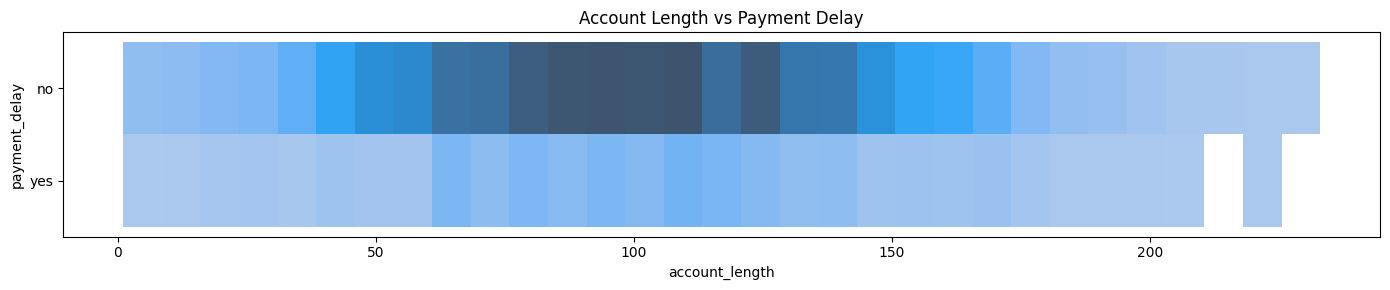

In [123]:
# Visualizarea clientilor care au intirziat cu plata lunara in comparatie cu lungimea contului

def account_length(x, y, data=df_train):
    plt.figure(figsize=(14, 3))
    sns.histplot(x=x, y=y, data=data, palette='deep', kde=True)
    plt.title('Account Length vs Payment Delay')
    plt.tight_layout()
    plt.show()

x = df_train['account_length']
y = df_train['payment_delay']

account_length(x, y)


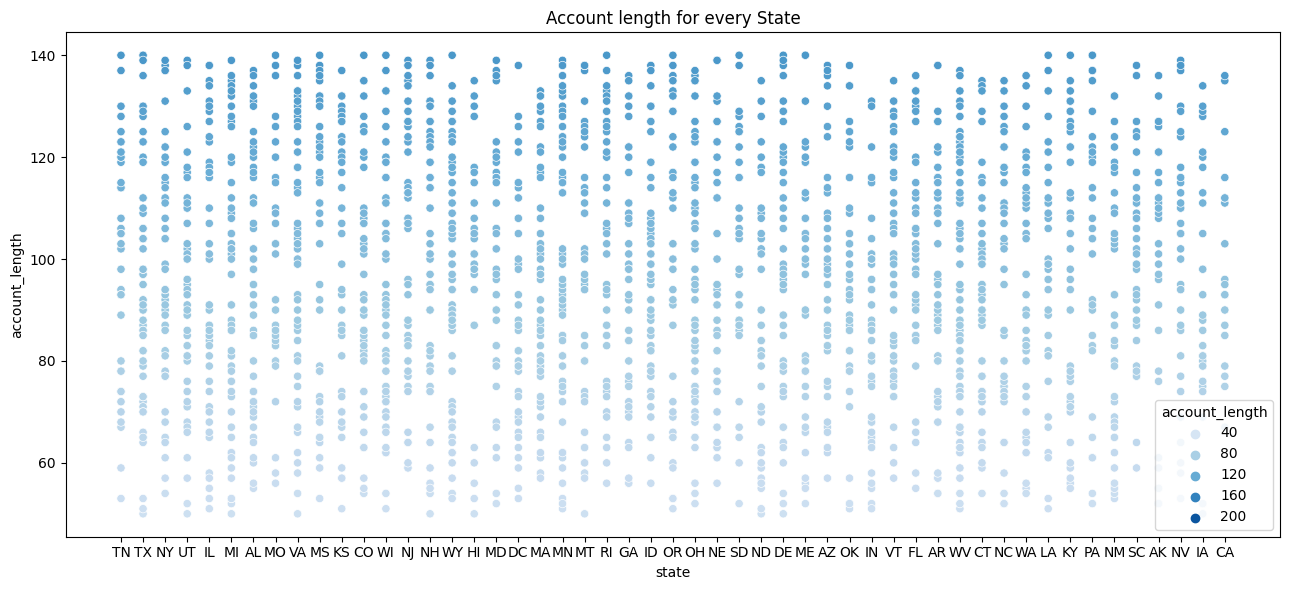

In [124]:
# Pe acest grafic putem vizualiza majoritatea clientilor care sunt predispusi la intirzierea platii
# Această grafic reiese din ultimul grafic grafic
def account_length(x, y, data=df_train):
    plt.figure(figsize=(13, 6))
    sns.scatterplot(x=x, y=y, hue='account_length', palette='Blues', data=data)
    plt.title('Account length for every State')
    plt.tight_layout()
    plt.show()

filtered_df = df_train[(df_train['account_length'] >= 50) & (df_train['account_length'] <= 140)]
y = filtered_df['account_length']
x = filtered_df['state']
account_length(x, y)

In [125]:
# Filtrarea si gruparea datelor dupa vechimea contului  in proportie cu statele ... clientii acestor state sunt cu cea mai mare rata de intirziere a platii
# Această statistică reiese din penultimul grafic

filtered_df = df_train[(df_train['account_length'] >= 60) & (df_train['account_length'] <= 140)]
length_counts_by_state = filtered_df.groupby('state')['account_length'].value_counts()
sorted_length_counts = length_counts_by_state.sort_values(ascending=False)
print(sorted_length_counts.nlargest(6))

state  account_length
MS     78                5
AK     121               4
IN     100               4
ID     92                4
NY     77                4
SC     78                4
Name: account_length, dtype: int64


In [126]:
# Definim o copye a datasetului fara outlierii mici si mari

new_row = df_train[(df_train['account_length'] >= 30) & (df_train['account_length'] <= 200)]
df_train = pd.DataFrame(new_row)

# DATA PROCCESING

In [127]:
# Crearea a catorva coloane


def calculate_total_charge_division_account_length(df):

    df['all_total_charge'] = (df['total_eve_charge'] + df['total_night_charge'] +
                              df['total_intl_charge'] + df['total_day_charge']) / df['account_length']
    df['day_minut_per_call'] = df['total_day_minutes'] / df['total_day_calls']
    df['eve_minut_per_call'] = df['total_eve_minutes'] / df['total_eve_calls']
    df['night_minut_per_call'] = df['total_night_minutes'] / df['total_night_calls']
    df['intl_minut_per_call'] = df['total_intl_minutes'] / df['total_intl_calls']


calculate_total_charge_division_account_length(df_test)
calculate_total_charge_division_account_length(df_train)


In [128]:
def replace_nan(x):
  col = ['day_minut_per_call', 'night_minut_per_call', 'intl_minut_per_call']
  x[col] = x[col].fillna(0)

replace_nan(df_train)
replace_nan(df_test)

In [129]:
# Pd dummies pe coloane object

col = ['area_code', 'international_plan', 'voice_mail_plan']

encoded_data_test = pd.DataFrame()

for i in col:
    encoded_column = pd.get_dummies(df_test[i], drop_first=True, prefix=i)
    encoded_data_test = pd.concat([encoded_data_test, encoded_column], axis=1)

df_test_encoded = pd.concat([df_test, encoded_data_test], axis=1)
df_test_encoded.drop(col, axis=1, inplace=True)



col2 = ['area_code', 'international_plan', 'voice_mail_plan']

encoded_data_train = pd.DataFrame()

for j in col2:
    encoded_column = pd.get_dummies(df_train[j], drop_first=True, prefix=j)
    encoded_data_train = pd.concat([encoded_data_train, encoded_column], axis=1)

df_train_subset_encoded = pd.concat([df_train, encoded_data_train], axis=1)
df_train_subset_encoded.drop(col2, axis=1, inplace=True)



In [130]:
df_train = pd.concat([df_train, encoded_data_train], axis=1)
df_test = pd.concat([df_test, encoded_data_test], axis=1)

In [131]:
df_train = df_train.drop(columns=['area_code', 'international_plan', 'voice_mail_plan'], axis=1)
df_test = df_test.drop(columns=['area_code', 'international_plan', 'voice_mail_plan'], axis=1)

In [132]:

lr = LabelEncoder()
df_train['payment_delay'] = lr.fit_transform(df_train['payment_delay'])
df_train['state'] = lr.fit_transform(df_train['state'])
df_test['state'] = lr.fit_transform(df_test['state'])

# SELECTED AND APLIED ALGORITMS

In [133]:
X = df_train.drop(columns='payment_delay')
y = df_train['payment_delay']

In [134]:
std = MinMaxScaler()
X = std.fit_transform(X)
df_test = std.transform(df_test)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TRAINING AND PREDICT DF_TRAIN


In [136]:

xgb_model_class = xgb.XGBClassifier()
param_grid = {
    'n_estimators': [800],
    'max_depth': [5],
    'learning_rate': [0.01]
}
randd = GridSearchCV(estimator=xgb_model_class, param_grid=param_grid, cv=5, scoring='accuracy')
randd.fit(X_train, y_train)

print('Cei mai buni parametri:', randd.best_params_)

y_pred_xgb_class = randd.predict(X_test)

print('XGBClassifier Report Tuned:')
print(classification_report(y_test, y_pred_xgb_class))


Cei mai buni parametri: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 800}
XGBClassifier Report Tuned:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       497
           1       0.90      0.74      0.81        77

    accuracy                           0.95       574
   macro avg       0.93      0.86      0.89       574
weighted avg       0.95      0.95      0.95       574



In [137]:
xgb_model_regres = xgb.XGBRegressor()
param_gril = {
    'n_estimators': [800],
    'max_depth': [5],
    'learning_rate': [0.01],
}
rand = GridSearchCV(estimator=xgb_model_regres, param_grid=param_gril, cv=5)
rand.fit(X_train, y_train)
print('cei mai buni parametri:', rand_search.best_params_)
y_pred_xgb_reg = rand.predict(X_test)
y_pred_round = [round(pred) for pred in y_pred_xgb_reg]


print('XGBRegressor Report:')
print(classification_report(y_test, y_pred_round))

cei mai buni parametri: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 800}
XGBRegressor Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       497
           1       0.92      0.75      0.83        77

    accuracy                           0.96       574
   macro avg       0.94      0.87      0.90       574
weighted avg       0.96      0.96      0.96       574



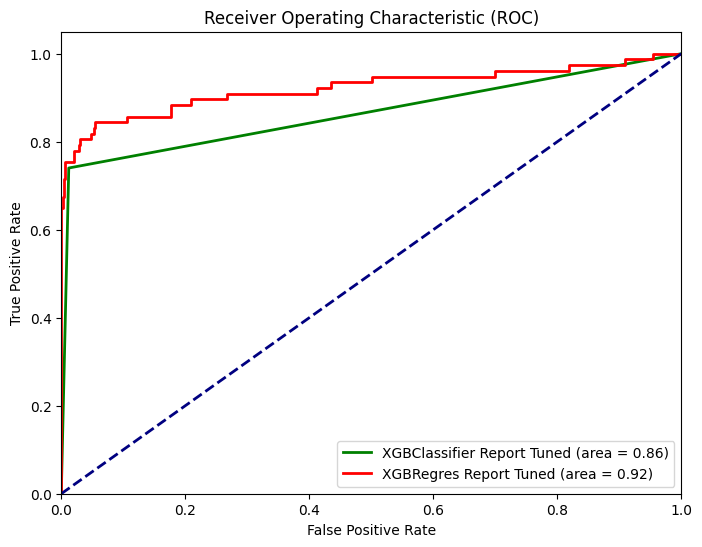

In [138]:
fpr_xgb_class, tpr_xgb_class, _ = roc_curve(y_test, y_pred_xgb_class)
roc_auc_xgb_class = auc(fpr_xgb_class, tpr_xgb_class,)

fpr_xgb_regres, tpr_xgb_regres, _ = roc_curve(y_test, y_pred_xgb_reg)
roc_auc_xgb_reg = auc(fpr_xgb_regres, tpr_xgb_regres,)



plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_class, tpr_xgb_class, color='green', lw=2, label='XGBClassifier Report Tuned (area = %0.2f)' % roc_auc_xgb_class)
plt.plot(fpr_xgb_regres, tpr_xgb_regres, color='red', lw=2, label='XGBRegres Report Tuned (area = %0.2f)' % roc_auc_xgb_reg)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')


plt.show()

# VISUALISATION RESULT , RESUME

In [139]:
pred = randd.predict(df_test)

In [140]:
df_test_with_predict['predict_delay_pay'] = pred

In [142]:
df_test_with_predict.to_csv('test_cursanti_pred', index=True)

In [144]:
bead_client_300 = df_test_with_predict[df_test_with_predict['predict_delay_pay'] == 1].head(300).index
print(f'Customers predict to be latee with payment: \n{bead_client_300}')

Customers predict to be latee with payment: 
Int64Index([20, 21, 26, 31, 37, 39, 47, 52, 63, 78, 90, 94, 111, 112, 150, 155, 157, 158, 160, 164, 168, 193, 195], dtype='int64')


In [145]:
# As atrage o mai mare atentie clientilor care sunt predispusi de a apela Serviciul clientela mai des
# De asemeni clienti care au  un număr mai mare de minute vorbite pe zi și o taxă totală mai ridicată pentru apelurile de zi
# O mare atentia ar atrage clientilor din aceste state MS AK NY ID IN si SC  ... EI SUNT CEI MAI PREDISPUSI SA INTIRZIE CU PLATA
# O ASEMENEA ATENTIA AR MERITA SI CLIENTII  CARE AU ADRESA CU ACEST ZIP COD ' AREA CODE 510'

# clientii cu aceste caracteristici sunt o majoritate care ar intirzia cu plata
